# OLIST Brazilian Ecommerce

sumber dataset: https://www.kaggle.com/olistbr/brazilian-ecommerce

Founded Date: 2014<br>
Founders: Tiago Dalvi<br>
Operating Status: Active<br>
Funding Status: Late Stage Venture<br>
Last Funding Type: Series C<br>
Number of Employees: 101-250<br>
Legal Name: OLIST SERVICOS DIGITAIS LTDA<br>

## Permasalahan
- Pelanggan memiliki karakteristik (atau <i>behavior</i>) yang berbeda-beda sehingga diperlukan promosi berdasarkan segmentasi pelanggan
- Untuk melakukan segmentasi diperlukan kriteria pelanggan untuk memperoleh informasi pelanggan yang berpotensial/tidak, pelanggan yang berkontribusi terhadap <i>churn rate</i> dan juga informasi tentang pelanggan-pelanggan yang masih dapat dipertahankan <i>retention rate</i>
- Pada dataset ini, jumlah pelanggan yang tidak membeli lagi sangat banyak sehingga diperlukan cara agar pelanggan dapat bertahan membeli pada ecommerce Olist
- Mendapatkan customer baru memang penting namun lebih penting lagi untuk mempertahankan customer lama yang sudah menjadi pelanggan karena mempertahankan pelanggan merupakan strategi kunci untuk sustainable growth
- Ada studi yang menyatakan bahwa peningkatan sebanyak 2% dalam customer retention punya dampak terhadap laba seperti memangkas biaya sebesar 10%. Oleh karena itu, sebuah bisnis sebisa mungkin berusaha untuk mempertahankan customer lama.

## Tujuan
- Melakukan segmentasi pelanggan berdasarkan metode analisis marketing <i>Recency, Frequency, Monetary Value</i> (RFM) untuk membidik target market dengan promosi yang tepat sesuai dengan kebutuhan pelanggan dan untuk mengetahui pelanggan yang <i>profitable</i> dan sebaliknya.
- Menganalisis perilaku pelanggan selama setahun dan melakukan prediksi kapan pelanggan tersebut akan melakukan pembelian pada tahun depan. Prediksi dilakukan untuk mengklasifikasikan pelanggan yang akan melakukan pembelian kembali dalam waktu kurang dari 4 bulan, yang tidak melakukan pembelian diatas 4 bulan dan pelanggan yang berpotensi churn (diatas 8 bulan)
- Perusahaan tidak akan memberikan promosi kepada pelanggan Class 2 karena sudah diprediksi akan membeli lagi, oleh karena itu perusahaan bertujuan untuk mengurangi kesalahan prediksi Class 2 agar kesalahan prediksi itu atau pelanggan yang salah prediksi tidak meninggalkan perusahaan
- Menghitung Churn Rate atau kehilangan pelanggan untuk mengetahui persentase pelanggan yang keluar dengan total pelanggan di awal bulan. Churn Rate merupakan hambatan bagi pertumbuhan. Selain dari menghambat pertumbuhan, kehilangan pelanggan juga berarti kehilangan pemasukan atau Revenue Churn Rate.
- Menghitung Retention Rate yakni jumlah pelanggan akhir periode dikurangi jumlah pelanggan awal periode dibagi dengan jumlah pelanggan pada akhir periode. Retention rate merupakan upaya perusahaan untuk mempertahankan pelanggan yang ada agar terus melakukan transaksi kepada perusahaan. Pelanggan yang loyal merupakan aset yang sangat penting bagi perusahaan karena akan terus melakukan transaksi dan bisa saja melakukan marketing gratis kepada kerabat ataupun teman-teman mereka. Tentunya mempunyai pelanggan yang loyal akan meningkatkan CLV dan Revenue bagi perusahaan.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
%matplotlib inline

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import time
from datetime import timedelta, datetime
import warnings
warnings.filterwarnings('ignore')

from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from operator import attrgetter

import os, ssl
if (not os.environ.get('PYTHONHTTPSVERIFY', '') and
    getattr(ssl, '_create_unverified_context', None)): 
    ssl._create_default_https_context = ssl._create_unverified_context

# Import Dataset

In [2]:
# Membaca data dan menghapus kolom Unnamed: 0
df = pd.read_csv('./Datasets/olist_dataset_all.csv')
df.drop(columns='Unnamed: 0', inplace=True)
df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour,semester
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,-23.576983,-46.587161,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Monday,10.0,October,2017.0,2017-10,10.0,3.0
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,-23.564630,-46.534268,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,15.0,Tuesday,8.0,August,2017.0,2017-08,18.0,2.0
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,-23.600462,-46.655318,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Wednesday,8.0,August,2017.0,2017-08,18.0,2.0
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,e781fdcc107d13d865fc7698711cc572,88032.0,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares,-27.528367,-48.491914,3.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,23.0,Monday,10.0,October,2017.0,2017-10,23.0,3.0
4,61dc7d82d2eb6ecf4f0ac2a3cd693cfb,eda669d85ef713eb385cf57a584a2b68,2017-11-05 21:54:53,cb85e26bc7feed69b59cdd1bc1aecb86,4213.0,sao paulo,SP,1.0,03b58043df5d7424df7eac2be2511c51,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,11.73,56.0,645.0,2.0,1650.0,30.0,4.0,30.0,cool_stuff,-23.592504,-46.602403,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,5.0,Sunday,11.0,November,2017.0,2017-11,21.0,3.0


# Dataset Summary
Summary terdiri dari total null value, null value percentage, total unique value, length, data type per columns.

In [3]:
# Describe dataset
df.describe()

,customer_zip_code_prefix,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,customer_lat,customer_lng,review_score,seller_zip_code_prefix,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_month,order_date_year,order_date_hour,semester
count,110848.000000,110848.000000,110848.000000,110848.000000,110012.000000,110012.000000,110012.000000,111565.000000,111565.000000,111565.000000,111565.000000,114833.000000,114833.000000,113833.000000,110973.000000,127496.000000,127496.000000,127496.000000,110848.000000,110848.000000,110848.000000,110848.000000,110845.000000
mean,35158.616619,1.198894,119.813602,19.937329,48.791359,786.262690,2.207386,2091.190463,30.165240,16.567418,23.002465,-21.069721,-46.202274,4.005332,24475.786516,27068.711411,-22.237525,-47.066412,15.564828,6.030537,2017.543564,14.749098,3.004628
std,29904.547654,0.708626,181.954146,15.674040,10.018827,650.962429,1.719241,3749.019303,16.141706,13.420555,11.702396,5.744114,4.172132,1.408018,27631.386321,28787.099939,3.979674,3.013301,8.662890,3.232437,0.503899,5.315514,0.876461
min,1003.000000,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,-33.689948,-72.916069,1.000000,1001.000000,1001.000000,-33.689948,-72.916069,1.000000,1.000000,2016.000000,0.000000,1.000000
25%,11250.000000,1.000000,39.900000,13.080000,42.000000,347.000000,1.000000,300.000000,18.000000,8.000000,15.000000,-23.588287,-48.192235,3.000000,6429.000000,7074.000000,-23.596804,-48.829744,8.000000,3.000000,2017.000000,11.000000,2.000000
50%,24344.000000,1.000000,74.900000,16.250000,52.000000,601.000000,1.000000,700.000000,25.000000,13.000000,20.000000,-22.919343,-46.633522,5.000000,13570.000000,14092.000000,-23.318127,-46.720250,16.000000,6.000000,2018.000000,15.000000,3.000000
75%,59068.000000,1.000000,133.900000,21.150000,57.000000,985.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,-19.967129,-43.591752,5.000000,28035.000000,36301.000000,-21.757321,-46.497268,23.000000,8.000000,2018.000000,19.000000,4.000000
max,99980.000000,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,42.184003,121.105394,5.000000,99730.000000,99990.000000,42.184003,121.105394,31.000000,12.000000,2018.000000,23.000000,4.000000


In [4]:
df_summary = pd.DataFrame({
    'columns': df.columns,
    'null_value_total': [df[i].isnull().sum() for i in df.columns],
    'unique_value_total': [df[i].nunique() for i in df.columns],
    'length': [df[i].shape[0] for i in df.columns],
    'data_type': [df[i].dtypes for i in df.columns]
})
df_summary['null_value_total_pct'] = round(df_summary['null_value_total'] / df_summary['length'] * 100, 2)
df_summary= df_summary[['columns', 'null_value_total', 'null_value_total_pct', 'unique_value_total', 'length', 'data_type']]
df_summary

,columns,null_value_total,null_value_total_pct,unique_value_total,length,data_type
0,order_id,21914,16.14,99441,135747,object
1,customer_id,24899,18.34,96478,135747,object
2,order_purchase_timestamp,24899,18.34,95956,135747,object
3,customer_unique_id,24899,18.34,93358,135747,object
4,customer_zip_code_prefix,24899,18.34,14889,135747,float64
5,customer_city,24899,18.34,4085,135747,object
6,customer_state,24899,18.34,27,135747,object
7,order_item_id,24899,18.34,21,135747,float64
8,product_id,24164,17.80,32951,135747,object
9,seller_id,24774,18.25,3095,135747,object


# Handling Null Values
- Karena yang akan dianalisis adalah semua customer, maka customer_unique_id yang bernilai null akan dihapus dari dataset
- Null value yang terdapat di product_category_name_english, customer_lat, customer_lng, geolocation_zip_code_prefi, geolocation_lat dan geolocation_lng tidak mempengaruhi analisis Machine Learning sehingga null value tidak akan dihapus, jika dihapus akan kehilangan data pelanggan

In [5]:
# Menghapus null value pada kolom order_id
df = df[~df.customer_unique_id.isnull()]

In [6]:
df = df[['order_id', 'customer_id', 'order_purchase_timestamp',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id', 'price',
       'freight_value', 
       'product_category_name_english', 'customer_lat', 'customer_lng',
       'review_score', 'seller_zip_code_prefix', 'seller_city', 'seller_state',
       'geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng',
       'order_date_day', 'order_date_day_name', 'order_date_month',
       'order_date_month_name', 'order_date_year', 'order_date_monthyear',
       'order_date_hour']]

In [7]:
df.isnull().sum()

order_id                            0
customer_id                         0
order_purchase_timestamp            0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
order_item_id                       0
product_id                          0
seller_id                           0
price                               0
freight_value                       0
product_category_name_english    1567
customer_lat                      293
customer_lng                      293
review_score                        0
seller_zip_code_prefix              0
seller_city                         0
seller_state                        0
geolocation_zip_code_prefix       253
geolocation_lat                   253
geolocation_lng                   253
order_date_day                      0
order_date_day_name                 0
order_date_month                    0
order_date_month_name               0
order_date_y

In [8]:
# Dataset setelah handling null value
df_summary = pd.DataFrame({
    'columns': df.columns,
    'null_value_total': [df[i].isnull().sum() for i in df.columns],
    'unique_value_total': [df[i].nunique() for i in df.columns],
    'length': [df[i].shape[0] for i in df.columns],
    'data_type': [df[i].dtypes for i in df.columns]
})
df_summary['null_value_total_pct'] = round(df_summary['null_value_total'] / df_summary['length'] * 100, 2)
df_summary= df_summary[['columns', 'null_value_total', 'null_value_total_pct', 'unique_value_total', 'length', 'data_type']]
df_summary

,columns,null_value_total,null_value_total_pct,unique_value_total,length,data_type
0,order_id,0,0.00,96478,110848,object
1,customer_id,0,0.00,96478,110848,object
2,order_purchase_timestamp,0,0.00,95956,110848,object
3,customer_unique_id,0,0.00,93358,110848,object
4,customer_zip_code_prefix,0,0.00,14889,110848,float64
5,customer_city,0,0.00,4085,110848,object
6,customer_state,0,0.00,27,110848,object
7,order_item_id,0,0.00,21,110848,float64
8,product_id,0,0.00,32216,110848,object
9,seller_id,0,0.00,2970,110848,object


In [9]:
df[df.product_category_name_english.isnull()].head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour
121,cd9ef363164449df0bf374f87fa1b1de,b5465de2043513d45163ffec2620e4bf,2017-05-22 16:29:35,c55ad9a8c04e8009e4ac169f7344a583,4332.0,sao paulo,SP,1.0,1b0e39ec889889ea1d492603d8512bfb,e26901d5ab434ce92fd9b5c256820a4e,32.9,9.06,NaN,-23.659125,-46.649073,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,22.0,Monday,5.0,May,2017.0,2017-05,16.0
129,03dd7d68a345c4fb5061f35f29ad959a,d107a7ac2cb11a52b6e269d277c17652,2017-06-15 11:14:43,fd28ec404b65abf3e0ae6245d79948f0,86020.0,londrina,PR,1.0,1b0e39ec889889ea1d492603d8512bfb,e26901d5ab434ce92fd9b5c256820a4e,39.9,15.10,NaN,-23.312601,-51.167180,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,15.0,Thursday,6.0,June,2017.0,2017-06,11.0
141,0e75e6ce3e632eb1473af3854f583029,1b222a0f1414bd06b17256aebafaa498,2017-04-24 10:14:16,f398130a46d78d120674c62552f3922d,31260.0,belo horizonte,MG,1.0,1b0e39ec889889ea1d492603d8512bfb,e26901d5ab434ce92fd9b5c256820a4e,32.9,14.52,NaN,-19.860207,-43.940735,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,24.0,Monday,4.0,April,2017.0,2017-04,10.0
143,49c0586d77735f8fdc96c83dd76ac808,c0fe20e105ef2b292a69762bcdd42308,2017-05-10 00:21:17,57a9298f4d37c4d86dcc49c1374be81f,5303.0,sao paulo,SP,1.0,1b0e39ec889889ea1d492603d8512bfb,e26901d5ab434ce92fd9b5c256820a4e,32.9,8.72,NaN,-23.527681,-46.730623,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,10.0,Wednesday,5.0,May,2017.0,2017-05,0.0
166,44ce4717fa02c8f0fb032b88cf45b8a3,52cb889b339c853bb6476e5601de2e58,2017-05-26 22:34:37,4f034a3aadb89d23a7ac701def40bdbc,20530.0,rio de janeiro,RJ,1.0,1b0e39ec889889ea1d492603d8512bfb,e26901d5ab434ce92fd9b5c256820a4e,39.9,14.10,NaN,-22.937686,-43.248869,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,26.0,Friday,5.0,May,2017.0,2017-05,22.0


In [10]:
df.duplicated().sum()

392

In [11]:
# df[df.order_purchase_timestamp == df.order_purchase_timestamp.max()]

<div class="alert alert-block alert-success">
Fitur dataset yang digunakan berjumlah 29 fitur. Fitur yang memiliki null value paling besar adalah product_category_name_english berjumlah 1.41% yang artinya ada barang yang tidak diterjemahkan ke dalam bahasa Inggris. Satu customer_unique_id bisa memiliki banyak order_id dan customer_id. Jumlah length > unique_value_total menandakan ada data order_id yang terduplikat atau ada pelanggan yang membeli barang lebih dari 1.
</div>

In [12]:
# Contoh pengambilan data order_id
df[df.order_id == '44e608f2db00c74a1fe329de44416a4e']

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour
50511,44e608f2db00c74a1fe329de44416a4e,a81ebb9b32f102298c0c89635b4b3154,2018-02-28 11:15:41,00053a61a98854899e70ed204dd4bafe,80410.0,curitiba,PR,2.0,58727e154e8e85d84052cd22b0136c84,218d46b86c1881d022bce9c68a7d4b15,191.0,18.59,sports_leisure,-25.431323,-49.279219,1.0,14070.0,ribeirao preto,SP,14070.0,-21.112713,-47.79081,28.0,Wednesday,2.0,February,2018.0,2018-02,11.0
50512,44e608f2db00c74a1fe329de44416a4e,a81ebb9b32f102298c0c89635b4b3154,2018-02-28 11:15:41,00053a61a98854899e70ed204dd4bafe,80410.0,curitiba,PR,1.0,62984ea1bba7fcea1f5b57084d3bf885,218d46b86c1881d022bce9c68a7d4b15,191.0,18.59,sports_leisure,-25.431323,-49.279219,1.0,14070.0,ribeirao preto,SP,14070.0,-21.112713,-47.79081,28.0,Wednesday,2.0,February,2018.0,2018-02,11.0


In [13]:
# df.to_csv('./Datasets/df_clean.csv')

<div class="alert alert-block alert-success">
Tabel diatas menunjukan dalam 1 kali order bisa terdapat beberapa product_id sehingga length order_id lebih besar dibanding jumlah unique value order_id.
</div>



# Exploratory Data Analysis

### 1) Total Order, customer_unique_id, products, cities and purchase date

In [14]:
summary_beginning = pd.DataFrame([
    {'Order': df['order_id'].nunique(),
     'Customer_unique_ID': df['customer_unique_id'].nunique(),
     'Products': len(df['product_id'].value_counts()),
     'Cities': len(df['customer_city'].value_counts()),
     'Sellers': df['seller_id'].nunique()
    }
], index=['Total'])
summary_beginning

,Order,Customer_unique_ID,Products,Cities,Sellers
Total,96478,93358,32216,4085,2970


In [15]:
# summary_beginning.to_csv('summary-beg.csv')

- Data customer adalah sebanyak 93358 dengan jumlah order 96478 dan produk yang dibeli sejumlah 32216 dan berlokasi di 4085 kota, dengan seller berjumlah 2970. 
- Ini menandakan bahwa ada pelanggan yang membeli produk lebih dari 1 per sekali order dan ada pelanggan yang melakukan transaksi pembelian di hari selanjutnya.

In [16]:
# Melakukan perhitungan revenue: price x freight_value
df['revenue'] = df['price'] + df['freight_value']

In [17]:
df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,-23.576983,-46.587161,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Monday,10.0,October,2017.0,2017-10,10.0,38.71
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.564630,-46.534268,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,15.0,Tuesday,8.0,August,2017.0,2017-08,18.0,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.600462,-46.655318,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Wednesday,8.0,August,2017.0,2017-08,18.0,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,e781fdcc107d13d865fc7698711cc572,88032.0,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,-27.528367,-48.491914,3.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,23.0,Monday,10.0,October,2017.0,2017-10,23.0,44.09
4,61dc7d82d2eb6ecf4f0ac2a3cd693cfb,eda669d85ef713eb385cf57a584a2b68,2017-11-05 21:54:53,cb85e26bc7feed69b59cdd1bc1aecb86,4213.0,sao paulo,SP,1.0,03b58043df5d7424df7eac2be2511c51,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,11.73,cool_stuff,-23.592504,-46.602403,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,5.0,Sunday,11.0,November,2017.0,2017-11,21.0,60.63


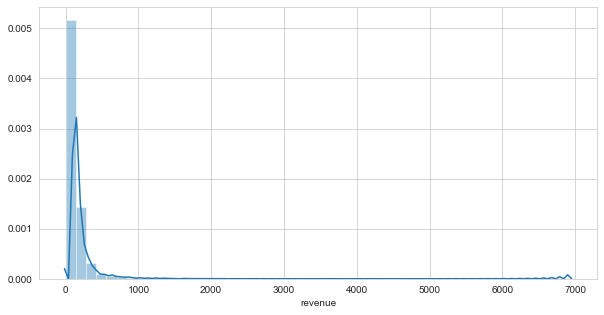

In [23]:
plt.figure(figsize=(10, 5))
sns.distplot(df['revenue'])
plt.show()

### 2) Total Revenue and Total Customers per Month

In [32]:
temp_1 = df.pivot_table(index='order_date_monthyear', values='revenue', aggfunc='sum').reset_index()

trace1 = go.Scatter(
    x = temp_1['order_date_monthyear'],
    y = temp_1['revenue'],
    text=temp_1['revenue'],
#     mode = 'lines+markers+text',
    name = 'Revenue',
    
)
layout = dict(title='Total Revenue per Month', 
              xaxis=dict(
                  title='Month', 
                  ticklen=10, 
                  zeroline=False, 
                  tickvals=temp_1['order_date_monthyear'],
                  tickangle=45),
              yaxis=dict(
                  title='Revenue')
             )
fig = dict(data=trace1, layout=layout)

iplot(fig)

- Revenue mengalami kenaikan yang paling pesat dari bulan Desember 2016 hingga bulan Maret 2017.
- Revenue paling tinggi diraih pada bulan November 2017

In [33]:
# temp_1.to_csv('temp1.csv')

In [34]:
df_temp = df.copy()

df_temp.drop_duplicates(subset='order_id', keep='last', inplace=True)

In [35]:
temp_2 = df_temp.pivot_table(index='order_date_monthyear', values='customer_unique_id', aggfunc='count').reset_index()

trace2 = go.Scatter(
    x = temp_2['order_date_monthyear'],
    y = temp_2['customer_unique_id'],
    mode = 'lines',
    name = 'Customers'
)
layout = dict(title='Total Customers per Month', 
              xaxis=dict(
                  title='Month', 
                  ticklen=10, 
                  zeroline=False, 
                  tickvals=temp_1['order_date_monthyear'],
                  tickangle=45),
              yaxis=dict(title='Total Customers')
             )
fig = dict(data=trace2, layout=layout)
iplot(fig)

- Jumlah pelanggan meningkat paling pesat (seperti revenue) pada bulan Desember 2016 hingga Maret 2017.
- Jumlah pelanggan paling tinggi diraih pada bulan November 2017.
- Pada bulan Maret 2017 hingga April 2017 pelanggan mengalami penurunan namun revenue mengalami sedikit kenaikan.

In [36]:
# temp_2.to_csv('temp2.csv')

### 3) Distribution of total products bought by each customers

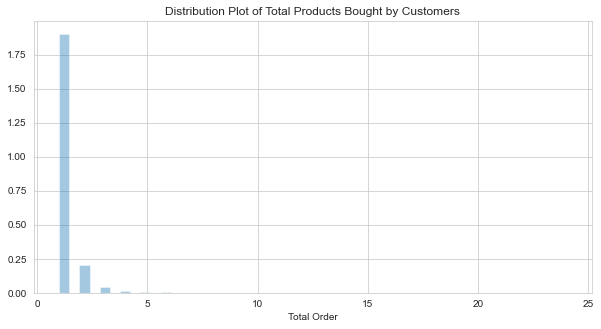

In [37]:
temp_3 = df.pivot_table(index='customer_unique_id', values='order_id', aggfunc='count').reset_index()
plt.figure(figsize=(10, 5))
plt.title('Distribution Plot of Total Products Bought by Customers')
sns.distplot(temp_3['order_id'])
plt.xlabel('Total Order')
plt.show()

- Pelanggan paling banyak membeli barang sejumlah 1.

### 4) Top 20 Customers with the most Orders

In [38]:
temp_4 = df.pivot_table(index='customer_unique_id', values='order_id', aggfunc='count').reset_index().sort_values(by='order_id', ascending=False).head(20)

trace4 = [
    go.Bar(
        x=temp_4['customer_unique_id'],
        y=temp_4['order_id'],
    )
]

layout = go.Layout(
        xaxis={"type": "category", 'tickangle':90, 'title': 'Customer Unique ID'},
        title='Top 20 Customers with the Most Order',
        yaxis=dict(title='Order Quantity')
    )
fig = go.Figure(data=trace4, layout=layout)
iplot(fig)

### 5) Top 20 Customers that Spend More Money to Buy Product

In [56]:
temp_5 = df.pivot_table(index='customer_unique_id', values='revenue', aggfunc='sum').reset_index().sort_values(by='revenue', ascending=False).head(20)

trace5 = [
    go.Bar(
        x=temp_5['customer_unique_id'],
        y=temp_5['revenue'],
    )
]

layout = go.Layout(
        xaxis={
            'type': 'category', 
            'tickangle':90, 
            'title': 'Customer Unique ID'
        },
        title='Top 20 Customers that Spend More Money to Buy Product',
        yaxis=dict(title='Total Spending')
    )
fig = go.Figure(data=trace5, layout=layout)
iplot(fig)



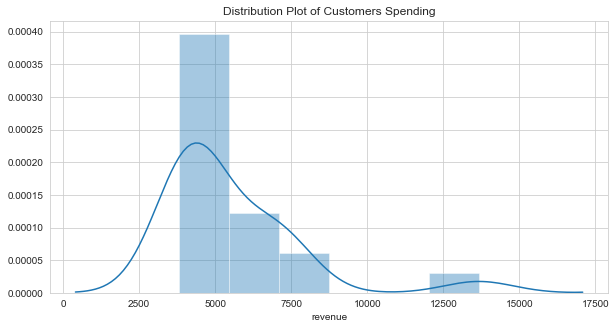

In [57]:
plt.figure(figsize=(10, 5))
plt.title('Distribution Plot of Customers Spending')
sns.distplot(temp_5['revenue'])
plt.show()

- Jumlah biaya yang dikeluarkan pelanggan untuk membeli barang membentuk kurva distribusi skewness.
- Paling banyak pelanggan berbelanja sebanyak sekitar 6000 satuan mata uang (tidak disebutkan dalam data mata uang yang dimaksud).

### 6) Top 50 Most Ordered Products

In [58]:
temp_6 = df.pivot_table(index='product_category_name_english', values='order_id', aggfunc='count').reset_index().sort_values(by='order_id', ascending=False).head(50)
temp_6

trace6 = [
    go.Bar(
        x=temp_6['product_category_name_english'],
        y=temp_6['order_id'],
    )
]

layout = go.Layout(
        xaxis={
            'type': 'category', 
            'title': 'Products'
        },
        title='Top 50 Most Ordered Products',
        yaxis=dict(title='Total Order')
    )
fig = go.Figure(data=trace6, layout=layout)
iplot(fig)

In [59]:
# Membuat CSV baru
# temp_6_products_revenue = df.pivot_table(index='product_category_name_english', values='revenue', aggfunc='sum').reset_index().sort_values(by='revenue', ascending=False).head(50)
# temp_6_products_revenue.to_csv('./Datasets/temp6productsrevenue.csv')

In [60]:
# temp_6_state = df.pivot_table(index=['product_category_name_english', 'customer_state'], values='order_id', aggfunc='count').reset_index().sort_values(by='order_id', ascending=False)
# temp_6_state.to_csv('./Datasets/temp6state.csv')

In [61]:
# temp_6_state.head()

In [62]:
# temp_6_state = df.groupby(['product_category_name_english', 'customer_state']).agg({'customer_lat': 'mean', 'customer_lng': 'mean', 'order_id': 'count'}).reset_index()
# temp_6_state.head()

In [63]:
# temp_6_state.to_csv('./Datasets/temp6state.csv')

In [64]:
# temp_6_state[temp_6_state.product_category_name_english == 'art']

In [65]:
# temp_6_state[temp_6_state.customer_state == 'AL'][['product_category_name_english', 'order_id']].sort_values(by='order_id', ascending=False).head(10)

In [66]:
# temp_6a = df.pivot_table(index='product_category_name_english', values='order_id', aggfunc='count').reset_index().sort_values(by='order_id', ascending=False)
# temp_6a.head(50)

### 7) Top 50 Most Generated Revenue Products

In [67]:
temp_7 = df.pivot_table(index='product_category_name_english', values='price', aggfunc='sum').reset_index().sort_values(by='price', ascending=False).head(50)
temp_7

trace7 = [
    go.Bar(
        x=temp_7['product_category_name_english'],
        y=temp_7['price'],
    )
]

layout = go.Layout(
        xaxis={
            'type': 'category', 
            'title': 'Products'
        },
        title='Top 50 Products That Most Generated Revenue',
        yaxis=dict(title='Revenue Generated')
    )
fig = go.Figure(data=trace7, layout=layout)
iplot(fig)

### 8) Average of Revenue per Month

In [68]:
temp_8 = df.pivot_table(index='order_date_monthyear', values='revenue', aggfunc='mean').reset_index().sort_values(by='order_date_monthyear')

trace8 = [
    go.Bar(
        x=temp_8['order_date_monthyear'],
        y=temp_8['revenue'],
    )
]

layout = go.Layout(
        xaxis={
            'type': 'category', 
            'title': 'Year-Month',
            'tickvals':temp_8['order_date_monthyear']
        },
        yaxis={
            'title': 'Average of Revenue'
        },
        title='Average of Revenue per Month'
    )
fig = go.Figure(data=trace8, layout=layout)
iplot(fig)

- Revenue rata-rata pada bulan September Desember 2016 mengalami penurunan, diduga data pada bulan tersebut belum lengkap.

### 9) Revenue and Total Customers of Existing and New Customers per Month

In [69]:
df_temp = df.copy()

In [70]:
df_temp.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,-23.576983,-46.587161,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Monday,10.0,October,2017.0,2017-10,10.0,38.71
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.564630,-46.534268,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,15.0,Tuesday,8.0,August,2017.0,2017-08,18.0,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.600462,-46.655318,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Wednesday,8.0,August,2017.0,2017-08,18.0,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,e781fdcc107d13d865fc7698711cc572,88032.0,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,-27.528367,-48.491914,3.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,23.0,Monday,10.0,October,2017.0,2017-10,23.0,44.09
4,61dc7d82d2eb6ecf4f0ac2a3cd693cfb,eda669d85ef713eb385cf57a584a2b68,2017-11-05 21:54:53,cb85e26bc7feed69b59cdd1bc1aecb86,4213.0,sao paulo,SP,1.0,03b58043df5d7424df7eac2be2511c51,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,11.73,cool_stuff,-23.592504,-46.602403,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,5.0,Sunday,11.0,November,2017.0,2017-11,21.0,60.63


In [71]:
# Dikelompokan per order_id
# customer_unique_id bisa saja lebih dari 1 untuk customer yang membeli
# di kemudian hari
temp_9_1 = df_temp.groupby(['order_id', 'customer_unique_id']).agg({'order_date_monthyear': 'max', 'order_purchase_timestamp':'max', 'revenue': 'sum'})
temp_9_1 = temp_9_1.reset_index()
temp_9_1.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02,2017-02-04 13:57:51,218.04


In [75]:
# Contoh pelanggan yang paling banyak melakukan transaksi di kemudian hari
temp_9_1[temp_9_1.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455'].sort_values(by='order_purchase_timestamp')



,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue
20505,369634708db140c5d2c4e365882c443a,8d50f5eadf50201ccdcedfb9e2ac8455,2017-06,2017-06-18 22:56:48,51.75
29969,4f62d593acae92cea3c5662c76122478,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07,2017-07-18 23:10:58,21.77
72160,bf92c69b7cc70f7fc2c37de43e366173,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07,2017-07-24 22:11:50,166.71
30789,519203404f6116d406a970763ee75799,8d50f5eadf50201ccdcedfb9e2ac8455,2017-08,2017-08-05 08:59:43,81.89
85743,e3071b7624445af6e4f3a1b23718667d,8d50f5eadf50201ccdcedfb9e2ac8455,2017-09,2017-09-05 22:14:52,51.75
77390,cd4b336a02aacabd0ef22f6db711f95e,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10,2017-10-18 23:25:04,37.77
51761,89d9b111d2b990deb5f5f9769f92800b,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10,2017-10-29 16:58:02,21.77
69392,b850a16d8faf65a74c51287ef34379ce,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11,2017-11-22 20:01:53,21.77
13262,23427a6bd9f8fd1b51f1b1e5cc186ab8,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,2018-05-21 22:44:31,53.38
40609,6bdf325f0966e3056651285c0aed5aad,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,2018-05-22 23:08:55,62.95


In [76]:
# Contoh pelanggan yang revenue nya telah di total
temp_9_1[temp_9_1['order_id'] == '00143d0f86d6fbd9f9b38ab440ac16f5']

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue
31,00143d0f86d6fbd9f9b38ab440ac16f5,bb8a37225e0279ac8a274c9765617eaf,2017-10,2017-10-16 15:29:43,109.29


In [77]:
# Dikelompokam per customer_unique_id
# order_id menjadi unique
# customer terakhir belanja dan jumlah total belanja
temp_9_2 = temp_9_1.groupby(['order_id', 'customer_unique_id']).agg({'order_date_monthyear': 'max', 'order_purchase_timestamp':'max', 'revenue': 'sum'})
temp_9_2 = temp_9_2.reset_index()
temp_9_2.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02,2017-02-04 13:57:51,218.04


In [78]:
# customer_unique_id menjadi unique
# membuat kolom recent purchase (pembelian pertama)
recent_purchase = df_temp.groupby('customer_unique_id')['order_purchase_timestamp'].min().reset_index()
recent_purchase.columns = ['customer_unique_id', 'MinPurchaseDate']
recent_purchase['MinPurchaseDate'] = pd.to_datetime(recent_purchase['MinPurchaseDate'])
recent_purchase['MinPurchaseYear-Month'] = recent_purchase['MinPurchaseDate'].map(lambda x: x.to_period('M'))
recent_purchase['MinPurchaseYearMonth'] = recent_purchase['MinPurchaseDate'].map(lambda date: 100 * date.year + date.month)

In [79]:
recent_purchase.head()

,customer_unique_id,MinPurchaseDate,MinPurchaseYear-Month,MinPurchaseYearMonth
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27,2018-05,201805
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27,2018-05,201805
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03,2017-03,201703
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41,2017-10,201710
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42,2017-11,201711


In [80]:
# Merging dataset temp_9_2 dan recent_purchase
df_new = pd.merge(temp_9_2, recent_purchase, on='customer_unique_id')
df_new.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue,MinPurchaseDate,MinPurchaseYear-Month,MinPurchaseYearMonth
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19,2017-09-13 08:59:02,2017-09,201709
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83,2017-04-26 10:53:06,2017-04,201704
2,c105be01f21c9df6a2579f59b95cbcd9,eb28e67c4c0b83846050ddfb8a35d051,2017-09,2017-09-18 16:12:04,24.73,2017-04-26 10:53:06,2017-04,201704
3,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87,2018-01-14 14:33:31,2018-01,201801
4,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78,2018-08-08 10:00:35,2018-08,201808


In [83]:
df_new_temp = df_new.copy()

In [85]:
df_new_temp['order_purchase_timestamp'] = pd.to_datetime(df_new_temp['order_purchase_timestamp'])
df_new_temp['OrderDateYearMonth'] = df_new_temp['order_purchase_timestamp'].map(lambda date: 100 * date.year + date.month)

In [91]:
df_new_temp.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue,MinPurchaseDate,MinPurchaseYear-Month,MinPurchaseYearMonth,OrderDateYearMonth
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19,2017-09-13 08:59:02,2017-09,201709,201709
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83,2017-04-26 10:53:06,2017-04,201704,201704
2,c105be01f21c9df6a2579f59b95cbcd9,eb28e67c4c0b83846050ddfb8a35d051,2017-09,2017-09-18 16:12:04,24.73,2017-04-26 10:53:06,2017-04,201704,201709
3,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87,2018-01-14 14:33:31,2018-01,201801,201801
4,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78,2018-08-08 10:00:35,2018-08,201808,201808


In [92]:
# Membuat kolom isExisting
# True: jika hari belanja terakhir > hari pertama belanja
# False: jika hari belanja terakhir !> hari pertama belanja
df_new_temp['isExisting'] = df_new_temp['MinPurchaseYearMonth'] < df_new_temp['OrderDateYearMonth']

In [93]:
df_new_temp.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue,MinPurchaseDate,MinPurchaseYear-Month,MinPurchaseYearMonth,OrderDateYearMonth,isExisting
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19,2017-09-13 08:59:02,2017-09,201709,201709,False
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83,2017-04-26 10:53:06,2017-04,201704,201704,False
2,c105be01f21c9df6a2579f59b95cbcd9,eb28e67c4c0b83846050ddfb8a35d051,2017-09,2017-09-18 16:12:04,24.73,2017-04-26 10:53:06,2017-04,201704,201709,True
3,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87,2018-01-14 14:33:31,2018-01,201801,201801,False
4,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78,2018-08-08 10:00:35,2018-08,201808,201808,False


In [94]:
# Contoh Existing Customer
df_new_temp[df_new_temp.customer_unique_id == '8d50f5eadf50201ccdcedfb9e2ac8455']

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue,MinPurchaseDate,MinPurchaseYear-Month,MinPurchaseYearMonth,OrderDateYearMonth,isExisting
7005,112eb6f37f1b9dabbced368fbbc6c9ef,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07,2018-07-23 21:53:02,107.85,2017-06-18 22:56:48,2017-06,201706,201807,True
7006,23427a6bd9f8fd1b51f1b1e5cc186ab8,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,2018-05-21 22:44:31,53.38,2017-06-18 22:56:48,2017-06,201706,201805,True
7007,369634708db140c5d2c4e365882c443a,8d50f5eadf50201ccdcedfb9e2ac8455,2017-06,2017-06-18 22:56:48,51.75,2017-06-18 22:56:48,2017-06,201706,201706,False
7008,4f62d593acae92cea3c5662c76122478,8d50f5eadf50201ccdcedfb9e2ac8455,2017-07,2017-07-18 23:10:58,21.77,2017-06-18 22:56:48,2017-06,201706,201707,True
7009,519203404f6116d406a970763ee75799,8d50f5eadf50201ccdcedfb9e2ac8455,2017-08,2017-08-05 08:59:43,81.89,2017-06-18 22:56:48,2017-06,201706,201708,True
7010,6bdf325f0966e3056651285c0aed5aad,8d50f5eadf50201ccdcedfb9e2ac8455,2018-05,2018-05-22 23:08:55,62.95,2017-06-18 22:56:48,2017-06,201706,201805,True
7011,838f8e96cf584a1d8d22eaf7143c7772,8d50f5eadf50201ccdcedfb9e2ac8455,2018-07,2018-07-04 22:35:13,30.41,2017-06-18 22:56:48,2017-06,201706,201807,True
7012,89d9b111d2b990deb5f5f9769f92800b,8d50f5eadf50201ccdcedfb9e2ac8455,2017-10,2017-10-29 16:58:02,21.77,2017-06-18 22:56:48,2017-06,201706,201710,True
7013,a1a6eadae352582010f449d8527b55f3,8d50f5eadf50201ccdcedfb9e2ac8455,2018-08,2018-08-18 12:39:19,96.40,2017-06-18 22:56:48,2017-06,201706,201808,True
7014,b850a16d8faf65a74c51287ef34379ce,8d50f5eadf50201ccdcedfb9e2ac8455,2017-11,2017-11-22 20:01:53,21.77,2017-06-18 22:56:48,2017-06,201706,201711,True


In [95]:
# Revenue per Month
temp_9 = pd.DataFrame(df_new_temp.groupby(['order_date_monthyear', 'isExisting'])['revenue'].agg(['sum', 'count']))
temp_9 = temp_9.reset_index()

temp_9.sort_values(by='order_date_monthyear', inplace=True)
temp_9.rename(columns={
    'order_date_monthyear': 'MonthYear',
    'isExisting': 'isExisting',
    'sum': 'Revenue',
    'count': 'TotalCustomers'
}, inplace=True)

In [96]:
temp_9

,MonthYear,isExisting,Revenue,TotalCustomers
0,2016-09,False,143.46,1
1,2016-10,False,47091.56,265
2,2016-12,False,19.62,1
3,2017-01,False,128434.48,749
4,2017-01,True,19.62,1
5,2017-02,False,272546.19,1651
6,2017-02,True,111.07,2
7,2017-03,False,415681.40,2541
8,2017-03,True,645.90,5
10,2017-04,True,2587.59,19


In [97]:
# temp_9.to_csv('./Datasets/temp9.csv')

In [98]:
trace9 = [
        go.Scatter(
        x=temp_9[temp_9['isExisting'] == False]['MonthYear'],
        y=temp_9[temp_9['isExisting'] == False]['Revenue'],
        name = 'New Customers'
    ),
    go.Scatter(
        x=temp_9[temp_9['isExisting'] == True]['MonthYear'],
        y=temp_9[temp_9['isExisting'] == True]['Revenue'],
        name = 'Existing Customers'
    ),

]

layout = go.Layout(
        xaxis={
            "type": "category", 
            'title': 'Year-Month'
        },
        yaxis={
            'title':'Revenue'
        },
        title='Revenue of New Customers vs Existing Customers'
    )
fig = go.Figure(data=trace9, layout=layout)
iplot(fig)

In [99]:
trace9_a = [
        go.Scatter(
        x=temp_9[temp_9['isExisting'] == False]['MonthYear'],
        y=temp_9[temp_9['isExisting'] == False]['TotalCustomers'],
        name = 'New Customers'
    ),
    go.Scatter(
        x=temp_9[temp_9['isExisting'] == True]['MonthYear'],
        y=temp_9[temp_9['isExisting'] == True]['TotalCustomers'],
        name = 'Existing Customers'
    ),

]

layout = go.Layout(
        xaxis={
            "type": "category", 
            'title': 'Year-Month'
        },
        yaxis={
            'title':'Total Customers'
        },
        title='Total New Customers VS Existing Customers'
    )
fig = go.Figure(data=trace9_a, layout=layout)
iplot(fig)

In [100]:
trace9_b = [
    
    go.Scatter(
        x=temp_9[temp_9['isExisting'] == True]['MonthYear'],
        y=temp_9[temp_9['isExisting'] == True]['Revenue'],
        name = 'Existing Customers'
    ),

]

layout = go.Layout(
        xaxis={
            "type": "category", 
            'title': 'Year-Month'
        },
        yaxis={
            'title':'Revenue'
        },
        title='Revenue of Existing Customers per Month'
    )
fig = go.Figure(data=trace9_b, layout=layout)
iplot(fig)

trace9_c = [
    go.Scatter(
        x=temp_9[temp_9['isExisting'] == True]['MonthYear'],
        y=temp_9[temp_9['isExisting'] == True]['TotalCustomers'],
        name = 'Existing Customers'
    ),

]

layout = go.Layout(
        xaxis={
            "type": "category", 
            'title': 'Year-Month'
        },
        yaxis={
            'title':'Total Customers'
        },
        title='Total Existing Customers per Month'
    )
fig = go.Figure(data=trace9_c, layout=layout)
iplot(fig)

In [101]:
temp_9.head()

,MonthYear,isExisting,Revenue,TotalCustomers
0,2016-09,False,143.46,1
1,2016-10,False,47091.56,265
2,2016-12,False,19.62,1
3,2017-01,False,128434.48,749
4,2017-01,True,19.62,1


### 10) New Customer Ratio

In [102]:
temp_10 = temp_9.pivot_table(index='MonthYear', columns='isExisting', values='TotalCustomers').reset_index()
temp_10.fillna(0, inplace=True)
temp_10.rename(columns={
    False: 'NewCustomers',
    True: 'ExistingCustomers'
}, inplace=True)

In [103]:
temp_10.head()

isExisting,MonthYear,NewCustomers,ExistingCustomers
0,2016-09,1.0,0.0
1,2016-10,265.0,0.0
2,2016-12,1.0,0.0
3,2017-01,749.0,1.0
4,2017-02,1651.0,2.0


In [104]:
temp_10['ratio'] = round(temp_10['NewCustomers'] / temp_10['ExistingCustomers'], 2)

trace10 = [
    go.Bar(
        x=temp_10['MonthYear'],
        y=temp_10['ratio'],
    )
]

layout = go.Layout(
        xaxis={"type": "category", 'title':'Year-Month'},
        title='New Customer Ratio',
        yaxis={'title': 'Customer Ratio'}
    
    )
fig = go.Figure(data=trace10, layout=layout)
iplot(fig)

In [105]:
# temp_10.to_csv('./Datasets/temp10.csv')

In [106]:
temp_10.head()

isExisting,MonthYear,NewCustomers,ExistingCustomers,ratio
0,2016-09,1.0,0.0,inf
1,2016-10,265.0,0.0,inf
2,2016-12,1.0,0.0,inf
3,2017-01,749.0,1.0,749.0
4,2017-02,1651.0,2.0,825.5


### 11) Retention Rate per Month

In [107]:
retention = pd.crosstab(temp_9_1['customer_unique_id'], temp_9_1['order_date_monthyear']).reset_index()
retention.head(10)

order_date_monthyear,customer_unique_id,2016-09,2016-10,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08
0,0000366f3b9a7992bf8c76cfdf3221e2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0000f46a3911fa3c0805444483337064,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0000f6ccb0745a6a4b88665a16c9f078,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0004aac84e0df4da2b147fca70cf8255,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
5,0004bd2a26a76fe21f786e4fbd80607f,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
6,00050ab1314c0e55a6ca13cf7181fecf,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
7,00053a61a98854899e70ed204dd4bafe,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
8,0005e1862207bf6ccc02e4228effd9a0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,0005ef4cd20d2893f0d9fbd94d3c0d97,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [108]:
monthyear = retention.columns[1:]
temp = []
for i in range(len(monthyear)-1):
    retention_dict = {}
    month = monthyear[i+1]
    prev_month = monthyear[i]
    retention_dict['Year_Month'] = month
    retention_dict['Total_Customers'] = retention[month].sum()
    retention_dict['Retained_Customers'] = retention[(retention[month] > 0) & (retention[prev_month] > 0)][month].sum()
    temp.append(retention_dict)

In [109]:
retention_df = pd.DataFrame(temp)
retention_df['Retention_Rate'] = retention_df['Retained_Customers'] / retention_df['Total_Customers']
retention_df['Churn_Rate'] = 1 - retention_df['Retention_Rate']
retention_df

,Year_Month,Total_Customers,Retained_Customers,Retention_Rate,Churn_Rate
0,2016-10,265,0,0.000000,1.000000
1,2016-12,1,0,0.000000,1.000000
2,2017-01,750,1,0.001333,0.998667
3,2017-02,1653,2,0.001210,0.998790
4,2017-03,2546,3,0.001178,0.998822
5,2017-04,2303,12,0.005211,0.994789
6,2017-05,3546,15,0.004230,0.995770
7,2017-06,3135,17,0.005423,0.994577
8,2017-07,3872,17,0.004390,0.995610
9,2017-08,4193,25,0.005962,0.994038


In [110]:
# retention_df.to_csv('./Datasets/temp11.csv')

In [111]:
trace11 = [
    go.Scatter(
        x=retention_df['Year_Month'],
        y=retention_df['Retention_Rate'],
    ) 
]

layout = go.Layout(
        xaxis={"type": "category", 'title': 'Year-Month'},
        title='Retention Rate per Month',
        yaxis=dict(title='Retention Rate')
    )
fig = go.Figure(data=trace11, layout=layout)
iplot(fig)

In [112]:
trace11_a = [
    go.Scatter(
        x=retention_df['Year_Month'],
        y=retention_df['Churn_Rate'],
    ) 
]

layout = go.Layout(
        xaxis={"type": "category", "title": "Year-Month"},
        title='Churn Rate per Month',
        yaxis=dict(title="Churn Rate")
    )
fig = go.Figure(data=trace11_a, layout=layout)
iplot(fig)

In [113]:
df_11 = temp_9_1.copy()

In [114]:
df_11.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02,2017-02-04 13:57:51,218.04


In [115]:
df_11.order_purchase_timestamp = pd.to_datetime(df_11.order_purchase_timestamp)

In [116]:
# df_11['order_date_month'] = df_11['order_date_month'].astype(int)
df_11['OrderMonth'] = df_11['order_purchase_timestamp'].dt.to_period('M')

In [117]:
df_11.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue,OrderMonth
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19,2017-09
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83,2017-04
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87,2018-01
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02,2017-02-04 13:57:51,218.04,2017-02


In [118]:
# Minimum Purchase Date
df_11['cohort'] = df_11.groupby('customer_unique_id')['order_purchase_timestamp'].transform('min').dt.to_period('M')


In [119]:
df_11.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue,OrderMonth,cohort
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19,2017-09,2017-09
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83,2017-04,2017-04
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87,2018-01,2018-01
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78,2018-08,2018-08
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02,2017-02-04 13:57:51,218.04,2017-02,2017-02


In [120]:
temp_11 = df_11.groupby(['cohort', 'OrderMonth']).agg(n_customers=('customer_unique_id', 'count')).reset_index(drop=False)
temp_11

,cohort,OrderMonth,n_customers
0,2016-09,2016-09,1
1,2016-10,2016-10,265
2,2016-10,2017-04,1
3,2016-10,2017-07,1
4,2016-10,2017-09,1
5,2016-10,2017-11,1
6,2016-10,2018-01,1
7,2016-10,2018-03,1
8,2016-10,2018-05,2
9,2016-10,2018-06,2


In [121]:
temp_11['Period'] = (temp_11['OrderMonth'] - temp_11['cohort']).apply(attrgetter('n'))

In [122]:
temp_11

,cohort,OrderMonth,n_customers,Period
0,2016-09,2016-09,1,0
1,2016-10,2016-10,265,0
2,2016-10,2017-04,1,6
3,2016-10,2017-07,1,9
4,2016-10,2017-09,1,11
5,2016-10,2017-11,1,13
6,2016-10,2018-01,1,15
7,2016-10,2018-03,1,17
8,2016-10,2018-05,2,19
9,2016-10,2018-06,2,20


In [123]:
temp_11a = temp_11.pivot_table(index='cohort', columns='Period', values='n_customers').iloc[4:, :-2]
acquired_customer = temp_11a.iloc[:,0]
# temp_11b = temp_11a.divide(acquired_customer, axis=0)
# cm = sns.light_palette("green", as_cmap=True)
# s = temp_11b.style.background_gradient(cmap=cm)
# temp_11b.iloc[:, 1:]
# s
temp_11a.rename(columns={0: 'TotalCustomers'}, inplace=True)


In [124]:
temp_11a

Period,TotalCustomers,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
cohort,,,,,,,,,,,,,,,,,,
2017-02,1651.0,3.0,5.0,2.0,7.0,2.0,4.0,3.0,2.0,3.0,2.0,5.0,2.0,3.0,2.0,1.0,1.0,3.0
2017-03,2541.0,12.0,9.0,12.0,9.0,4.0,4.0,8.0,8.0,2.0,9.0,3.0,5.0,3.0,4.0,6.0,2.0,3.0
2017-04,2284.0,15.0,6.0,5.0,6.0,6.0,9.0,7.0,7.0,4.0,6.0,2.0,1.0,1.0,2.0,2.0,4.0,NaN
2017-05,3517.0,17.0,16.0,10.0,10.0,12.0,16.0,5.0,9.0,11.0,9.0,12.0,8.0,1.0,6.0,7.0,NaN,NaN
2017-06,3092.0,16.0,13.0,13.0,10.0,12.0,11.0,7.0,4.0,6.0,9.0,12.0,5.0,6.0,10.0,NaN,NaN,NaN
2017-07,3820.0,22.0,13.0,9.0,13.0,8.0,12.0,4.0,8.0,11.0,8.0,12.0,5.0,9.0,NaN,NaN,NaN,NaN
2017-08,4133.0,29.0,16.0,11.0,14.0,23.0,12.0,11.0,6.0,6.0,10.0,8.0,5.0,NaN,NaN,NaN,NaN,NaN
2017-09,4070.0,28.0,22.0,15.0,18.0,13.0,9.0,10.0,11.0,7.0,10.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-10,4384.0,33.0,11.0,4.0,11.0,9.0,9.0,17.0,13.0,8.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [125]:
# import matplotlib.colors as mcolors
# with sns.axes_style('white'):
#     fig, ax = plt.subplots(1, 2, figsize=(12, 8), sharey=True, gridspec_kw={'width_ratios': [1, 20]})
#     sns.heatmap(temp_11a, mask=temp_11b.isnull(), fmt='.0%', cmap='Greys', ax=ax[1])
#     ax[1].set_title('Monthly Cohorts: User Retention', fontsize=16)
#     ax[1].set(xlabel='# of periods', ylabel='')

#     cohort_df = pd.DataFrame(acquired_customer).rename(columns={0:'cohort_size'})
#     white_cmap = mcolors.ListedColormap(['white'])
#     sns.heatmap(cohort_df, annot=True, cbar=False, fmt='g', ax=ax[0])
#     fig.tight_layout()

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'



In [126]:
# pip install dash-renderer

### 12) Customers Total Order and Total Revenue Activity

In [127]:
df['order_date_hour'] = df['order_date_hour'].astype(int)

In [128]:
temp_12 = df.groupby(['order_date_day_name', 'order_date_hour']).nunique()['order_id'].unstack()

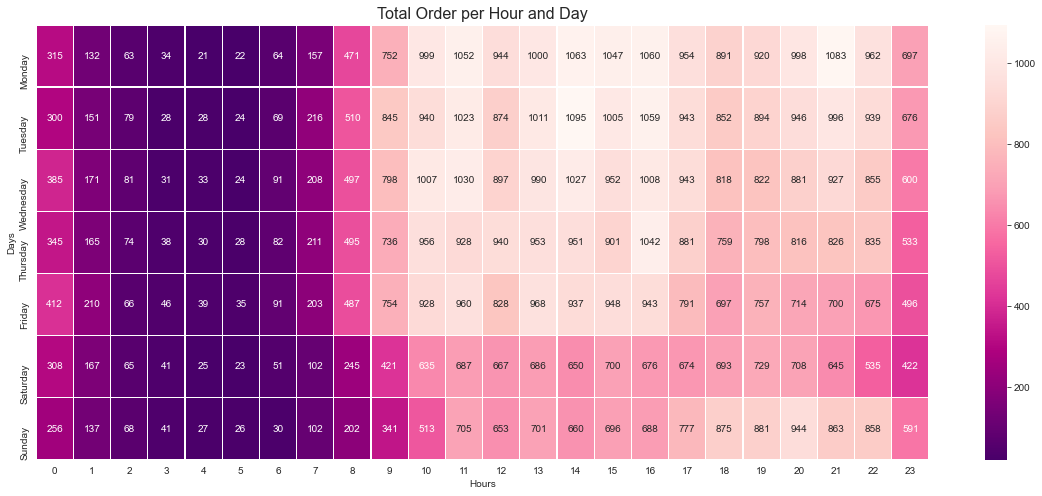

In [129]:
plt.figure(figsize=(20, 8))
sns.heatmap(temp_12.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']), cmap='RdPu_r', annot=True, fmt='d', linewidths=0.2)
plt.title('Total Order per Hour and Day', fontsize=16)
plt.xlabel('Hours')
# plt.xticks(temp_12.columns, np.arange(24))
plt.ylabel('Days')
plt.show()

In [130]:
# temp_12.to_csv('temp12.csv')

In [131]:
temp_12_a = df.groupby(['order_date_day_name', 'order_date_hour'])['revenue'].sum().unstack() #['revenue'].unstack()
temp_12_a = round(temp_12_a.divide(1000), 2)

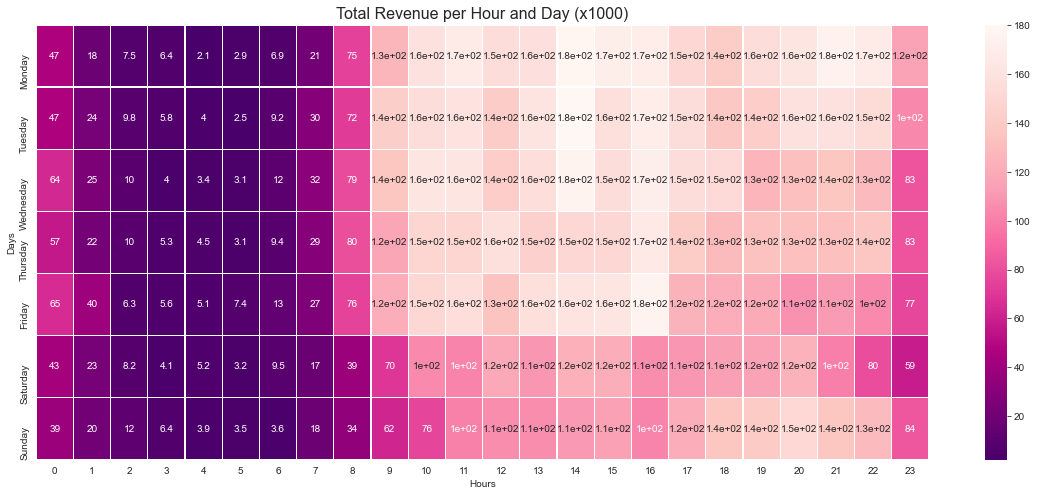

In [132]:
plt.figure(figsize=(20, 8))
sns.heatmap(temp_12_a.reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']), cmap='RdPu_r', annot=True, linewidths=0.2)
plt.title('Total Revenue per Hour and Day (x1000)', fontsize=16)
plt.xlabel('Hours')
plt.ylabel('Days')
plt.show()

In [133]:
temp_12_a.head()

order_date_hour,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23
order_date_day_name,,,,,,,,,,,,,,,,,,,,,,,,
Friday,65.34,39.82,6.35,5.56,5.11,7.39,13.48,26.94,75.72,122.27,150.01,156.23,134.84,157.05,161.26,162.92,176.16,124.55,121.32,120.20,107.58,111.46,104.89,76.81
Monday,46.88,18.07,7.46,6.44,2.14,2.92,6.92,21.37,74.78,126.95,158.28,168.57,154.73,157.57,177.65,170.57,169.74,149.83,140.82,155.79,163.32,175.05,168.06,115.39
Saturday,43.42,23.26,8.24,4.14,5.22,3.17,9.52,17.23,38.84,70.25,104.61,102.82,119.55,109.88,123.33,122.22,105.96,109.39,113.78,115.93,124.26,100.72,79.83,58.99
Sunday,38.79,20.30,11.97,6.43,3.91,3.45,3.59,17.72,34.17,62.04,76.14,101.20,105.89,106.13,110.94,114.58,102.22,121.13,135.79,140.31,151.55,135.76,129.30,83.84
Thursday,56.96,21.92,10.44,5.35,4.52,3.15,9.36,29.47,80.38,117.25,148.18,148.68,156.92,145.23,150.05,149.76,166.85,141.08,129.75,133.57,133.37,133.01,137.70,82.61


In [134]:
# temp_12_a.to_csv('temp12s.csv')

### 13) First timer and Existing Customers

In [135]:
temp_13 = df.copy()

In [136]:
x = temp_13.groupby('customer_unique_id').agg({
    'order_item_id': 'count'
}).reset_index()

In [137]:
temp = pd.DataFrame({
    'isExisting': ['Existing Customers', 'New Customers'],
    'Total': [ x[x['order_item_id'] == 1]['customer_unique_id'].count(),
             x[x['order_item_id'] != 1]['customer_unique_id'].nunique()
             ]
})
temp

,isExisting,Total
0,Existing Customers,81667
1,New Customers,11691


In [138]:
# temp.to_csv('./Datasets/temp13.csv')

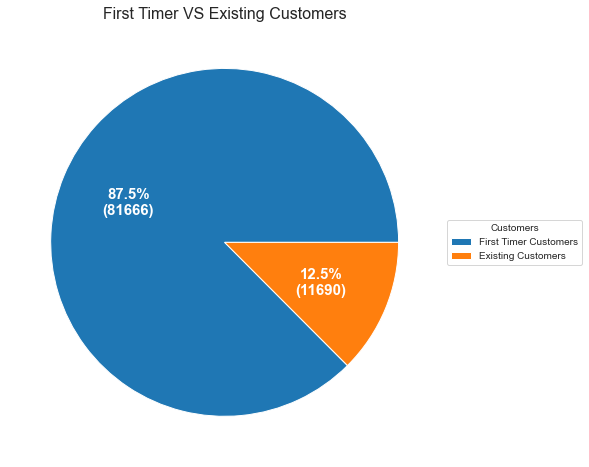

In [139]:
fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(aspect="equal"))
first_timer = x[x['order_item_id'] == 1]['customer_unique_id'].count()
existing = x[x['order_item_id'] != 1]['customer_unique_id'].nunique()
data = [first_timer, existing]
names = ['First Timer Customers', 'Existing Customers']

def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)


wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                  textprops=dict(color="w"))

ax.legend(wedges, names,
          title="Customers",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

plt.setp(autotexts, size=15, weight="bold")

ax.set_title("First Timer VS Existing Customers", fontsize=16)

plt.show()

- Sebanyak 81666 pelanggan baru pernah membeli 1 kali pada Olist.
- Sedangkan jumlah pelanggan yang melakukan order lebih dari sekali pada Olist ada 11690 pelanggan.

### 14) Revenue per Month

In [140]:
df_14 = temp_9_1.copy()

In [141]:
df_14.order_purchase_timestamp = pd.to_datetime(df_14.order_purchase_timestamp)

In [142]:
df_14.order_purchase_timestamp.dtypes

dtype('<M8[ns]')

In [143]:
df_14['order_monthyear'] = df_14.order_purchase_timestamp.dt.strftime('%b-%Y')
df_14['year'] = df_14.order_purchase_timestamp.dt.year
df_14['month'] = df_14.order_purchase_timestamp.dt.month
df_14['month_name'] = df_14.order_purchase_timestamp.dt.month_name()

In [144]:
df_14.head()

,order_id,customer_unique_id,order_date_monthyear,order_purchase_timestamp,revenue,order_monthyear,year,month,month_name
0,00010242fe8c5a6d1ba2dd792cb16214,871766c5855e863f6eccc05f988b23cb,2017-09,2017-09-13 08:59:02,72.19,Sep-2017,2017,9,September
1,00018f77f2f0320c557190d7a144bdd3,eb28e67c4c0b83846050ddfb8a35d051,2017-04,2017-04-26 10:53:06,259.83,Apr-2017,2017,4,April
2,000229ec398224ef6ca0657da4fc703e,3818d81c6709e39d06b2738a8d3a2474,2018-01,2018-01-14 14:33:31,216.87,Jan-2018,2018,1,January
3,00024acbcdf0a6daa1e931b038114c75,af861d436cfc08b2c2ddefd0ba074622,2018-08,2018-08-08 10:00:35,25.78,Aug-2018,2018,8,August
4,00042b26cf59d7ce69dfabb4e55b4fd9,64b576fb70d441e8f1b2d7d446e483c5,2017-02,2017-02-04 13:57:51,218.04,Feb-2017,2017,2,February


In [145]:
revenue_per_month = pd.DataFrame(df_14.groupby(['year', 'month', 'month_name', 'order_monthyear'])['revenue'].sum()).reset_index()
rev_2016 = revenue_per_month[revenue_per_month['year'] == 2016]
rev_2017 = revenue_per_month[revenue_per_month['year'] == 2017]
rev_2018 = revenue_per_month[revenue_per_month['year'] == 2018]

In [146]:
revenue_per_month

,year,month,month_name,order_monthyear,revenue
0,2016,9,September,Sep-2016,143.46
1,2016,10,October,Oct-2016,47091.56
2,2016,12,December,Dec-2016,19.62
3,2017,1,January,Jan-2017,128454.10
4,2017,2,February,Feb-2017,272657.26
5,2017,3,March,Mar-2017,416327.30
6,2017,4,April,Apr-2017,391484.45
7,2017,5,May,May-2017,570837.90
8,2017,6,June,Jun-2017,494147.47
9,2017,7,July,Jul-2017,570027.48


In [147]:
trace14 = go.Figure(data=[
    go.Bar(name='Revenue 2016', x=rev_2016['month_name'], y=rev_2016['revenue']),
    go.Bar(name='Revenue 2017', x=rev_2017['month_name'], y=rev_2017['revenue']),
    go.Bar(name='Revenue 2018', x=rev_2018['month_name'], y=rev_2018['revenue']) 
])

layout = go.Layout(
        xaxis={
            "type": "category", 
            "title": "Month", 
            "tickangle": 90
        },
        title='Churn Rate per Month',
)

fig = go.Figure(data=trace14, layout=layout)
fig.update_layout(
    barmode='group', 
    xaxis_tickangle=90, 
    xaxis_title="Month",
    yaxis_title="Total Revenue",
    title_text="Revenue Comparation per Month and Year")
iplot(fig)

### 15) Products Ordered and Revenue Total in Each City

In [148]:
df_15 = df.copy()

In [149]:
df_15.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,-23.576983,-46.587161,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Monday,10.0,October,2017.0,2017-10,10,38.71
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.564630,-46.534268,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,15.0,Tuesday,8.0,August,2017.0,2017-08,18,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.600462,-46.655318,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Wednesday,8.0,August,2017.0,2017-08,18,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,e781fdcc107d13d865fc7698711cc572,88032.0,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,-27.528367,-48.491914,3.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,23.0,Monday,10.0,October,2017.0,2017-10,23,44.09
4,61dc7d82d2eb6ecf4f0ac2a3cd693cfb,eda669d85ef713eb385cf57a584a2b68,2017-11-05 21:54:53,cb85e26bc7feed69b59cdd1bc1aecb86,4213.0,sao paulo,SP,1.0,03b58043df5d7424df7eac2be2511c51,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,11.73,cool_stuff,-23.592504,-46.602403,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,5.0,Sunday,11.0,November,2017.0,2017-11,21,60.63


In [150]:
products = pd.DataFrame(df_15.groupby(['customer_state', 'product_category_name_english', 'customer_lat', 'customer_lng'])['revenue'].agg(['count', 'sum']).reset_index())
products.rename(columns={'count': 'Total_Order', 'sum': 'Total_Revenue'}, inplace=True)    
products.head(10)

,customer_state,product_category_name_english,customer_lat,customer_lng,Total_Order,Total_Revenue
0,AC,auto,-9.993372,-67.816433,1,171.03
1,AC,auto,-9.956479,-67.828500,2,403.50
2,AC,auto,-9.955303,-67.848538,1,87.38
3,AC,baby,-10.652226,-68.502935,1,298.30
4,AC,baby,-9.977964,-67.834306,1,426.08
5,AC,baby,-9.945319,-67.823160,1,147.59
6,AC,bed_bath_table,-9.993372,-67.816433,1,186.83
7,AC,bed_bath_table,-9.989061,-67.844090,3,538.38
8,AC,books_general_interest,-9.956479,-67.828500,1,595.49
9,AC,books_general_interest,-9.955303,-67.848538,1,162.02


### 16) State VS Revenue and Total Order

In [151]:
df.head()

,order_id,customer_id,order_purchase_timestamp,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,price,freight_value,product_category_name_english,customer_lat,customer_lng,review_score,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,order_date_day,order_date_day_name,order_date_month,order_date_month_name,order_date_year,order_date_monthyear,order_date_hour,revenue
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,3149.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,8.72,housewares,-23.576983,-46.587161,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Monday,10.0,October,2017.0,2017-10,10,38.71
1,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,2017-08-15 18:29:31,3a51803cc0d012c3b5dc8b7528cb05f7,3366.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.564630,-46.534268,4.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,15.0,Tuesday,8.0,August,2017.0,2017-08,18,37.77
2,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,2017-08-02 18:24:47,ef0996a1a279c26e7ecbd737be23d235,2290.0,sao paulo,SP,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,7.78,housewares,-23.600462,-46.655318,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,2.0,Wednesday,8.0,August,2017.0,2017-08,18,37.77
3,bfc39df4f36c3693ff3b63fcbea9e90a,53904ddbea91e1e92b2b3f1d09a7af86,2017-10-23 23:26:46,e781fdcc107d13d865fc7698711cc572,88032.0,florianopolis,SC,1.0,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.99,14.10,housewares,-27.528367,-48.491914,3.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,23.0,Monday,10.0,October,2017.0,2017-10,23,44.09
4,61dc7d82d2eb6ecf4f0ac2a3cd693cfb,eda669d85ef713eb385cf57a584a2b68,2017-11-05 21:54:53,cb85e26bc7feed69b59cdd1bc1aecb86,4213.0,sao paulo,SP,1.0,03b58043df5d7424df7eac2be2511c51,3504c0cb71d7fa48d967e0e4c94d59d9,48.90,11.73,cool_stuff,-23.592504,-46.602403,5.0,9350.0,maua,SP,9350.0,-23.680729,-46.444238,5.0,Sunday,11.0,November,2017.0,2017-11,21,60.63


In [152]:
# State VS Revenue
state_revenue = pd.DataFrame(df.groupby(['customer_state', 'order_date_year'])['revenue'].sum().reset_index())
state_revenue['order_date_year'] = state_revenue['order_date_year'].astype(int)
state_revenue.head()

,customer_state,order_date_year,revenue
0,AC,2017,12892.23
1,AC,2018,6683.10
2,AL,2016,76.60
3,AL,2017,51100.05
4,AL,2018,43298.53


In [153]:
# State VS Total Order
state_order = pd.DataFrame(df.groupby(['customer_state', 'order_date_year'])['order_id'].nunique().reset_index())
state_order['order_date_year'] = state_order['order_date_year'].astype(int)
state_order.head()

,customer_state,order_date_year,order_id
0,AC,2017,53
1,AC,2018,27
2,AL,2016,1
3,AL,2017,198
4,AL,2018,198


### 17) Best Generated Revenue Products in each state

In [180]:
best_products = df.pivot_table(index=['customer_state', 'order_date_year', 'product_category_name_english'], values='revenue', aggfunc='sum').sort_values(by='revenue', ascending=False).reset_index()

In [181]:
best_products.head()

,customer_state,order_date_year,product_category_name_english,revenue
0,SP,2018.0,health_beauty,336443.05
1,SP,2018.0,bed_bath_table,314899.33
2,SP,2018.0,watches_gifts,262837.95
3,SP,2018.0,sports_leisure,241329.30
4,SP,2017.0,bed_bath_table,241062.70


In [182]:
best_prods = best_products.drop_duplicates(subset=['customer_state', 'order_date_year'], keep='first')

In [183]:
best_prods

,customer_state,order_date_year,product_category_name_english,revenue
0,SP,2018.0,health_beauty,336443.05
4,SP,2017.0,bed_bath_table,241062.70
17,MG,2018.0,health_beauty,112800.25
19,RJ,2018.0,watches_gifts,108913.10
21,RJ,2017.0,bed_bath_table,93472.19
31,MG,2017.0,bed_bath_table,79033.12
66,PR,2018.0,watches_gifts,42830.27
72,RS,2018.0,bed_bath_table,38212.42
84,RS,2017.0,bed_bath_table,35128.28
89,BA,2018.0,health_beauty,33471.52
